In [4]:
import cv2
from google.colab.patches import cv2_imshow
import os 
os.chdir('/content/sample_data')

In [ ]:
import os 
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive")

Mounted at /content/drive


In [6]:
import zipfile
#with zipfile.ZipFile("/content/drive/MyDrive/dsp/ass 2/Reduced MNIST Data.zip","r") as zip_ref:
with zipfile.ZipFile("/content/Reduced MNIST Data.zip","r") as zip_ref:
    #zip_ref.extractall("/content/drive/MyDrive/dsp/ass 2/data")
    zip_ref.extractall("/content/data")

In [8]:
#loading training data
import cv2
import os
import numpy as np
def collect_data(filename):
  images = []
  labels = []
  #filename = '/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Trainging data'
  for folder in np.sort(os.listdir(filename)):
    for filee in os.listdir(os.path.join(filename,folder)):
      img = cv2.imread(os.path.join(filename,folder,filee),0) 
      #print(os.path.join(filename,folder,filee))
      if img is not None:
        images.append(img)
        labels.append(int(folder))
  return images,labels

In [9]:
#train_data,train_labels = collect_data('/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Trainging data')
#test_data,test_labels = collect_data('/content/drive/MyDrive/dsp/ass 2/data/Reduced MNIST Data/Reduced Testing data')
train_data,train_labels = collect_data('/content/data/Reduced MNIST Data/Reduced Trainging data')
test_data,test_labels = collect_data('/content/data/Reduced MNIST Data/Reduced Testing data')

In [10]:
import numpy as np
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels).reshape(1,10000)
test_labels = np.array(test_labels).reshape(1,2000)
train_data = train_data.reshape(len(train_data),-1)
test_data = test_data.reshape(len(test_data),-1)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [12]:
lda = LDA(n_components = None)
Lda_train_data = lda.fit_transform(train_data,train_labels.reshape(10000,))
Lda_test_data = lda.transform(test_data)

In [13]:
from sklearn.utils import shuffle
x , y = shuffle(Lda_train_data,train_labels.reshape(10000,))

In [14]:
var = np.cumsum(lda.explained_variance_ratio_)
components = np.where(var>.95)

In [15]:
var

array([0.24190531, 0.42070302, 0.57832198, 0.69427713, 0.79199785,
       0.86769081, 0.92543214, 0.96548838, 1.        ])

In [16]:
lda = LDA(n_components = 6) #for 96% variation
Lda_train_data = lda.fit_transform(train_data,train_labels.reshape(10000,))
Lda_test_data = lda.transform(test_data)

In [17]:
from sklearn.cluster import KMeans
import time
num_cluster_per_num = 1
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 0.5208706855773926
Processing time is : 0.1998608112335205


In [18]:
def map_clast(y_pred,num_cluster):
  mapped = []
  for i in range(0,10):
    mapped.append(np.bincount(y_pred[i*200:(i+1)*200]).argsort()[-num_cluster:])
  return mapped

In [20]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [21]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(new_outputs[0],test_labels[0])

0.831

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=num_cluster_per_num*10)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Lda_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 29.02907109260559
Processing time is : 0.0027077198028564453


In [24]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.8575


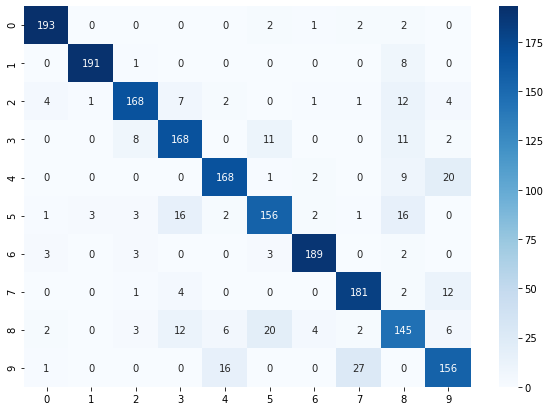

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [33]:
num_cluster_per_num = 4
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 4.281201601028442
Processing time is : 0.6277322769165039


In [34]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [35]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [36]:
accuracy_score(new_outputs[0],test_labels[0])

0.846

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=num_cluster_per_num*10)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Lda_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 73.71498847007751
Processing time is : 0.005097866058349609


In [31]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.872


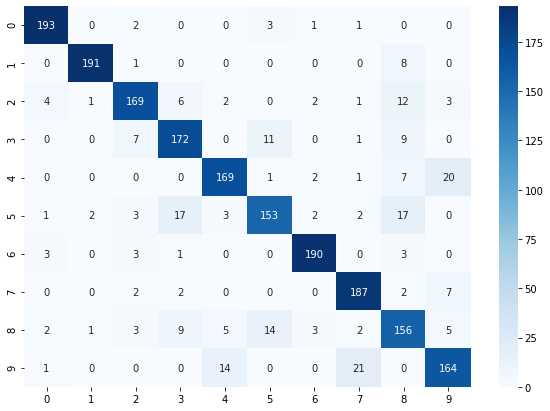

In [32]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [37]:
num_cluster_per_num = 16
kmeans = KMeans(n_clusters=num_cluster_per_num*10, random_state=0,max_iter=300)
time_before_fitting = time.time()
kmeans.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = kmeans.fit_predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 10.638042211532593
Processing time is : 1.7518465518951416


In [38]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [39]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [40]:
accuracy_score(new_outputs[0],test_labels[0])

0.8765

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
("kmeans", KMeans(n_clusters=num_cluster_per_num*10)),
("log_reg", LogisticRegression(max_iter=10000)),
])
time_before_fitting = time.time()
pipeline.fit(Lda_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
out_puts = pipeline.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 85.90160202980042
Processing time is : 0.007535219192504883


In [42]:
print('accuracy_score = ',accuracy_score(out_puts,test_labels[0]))

accuracy_score =  0.8745


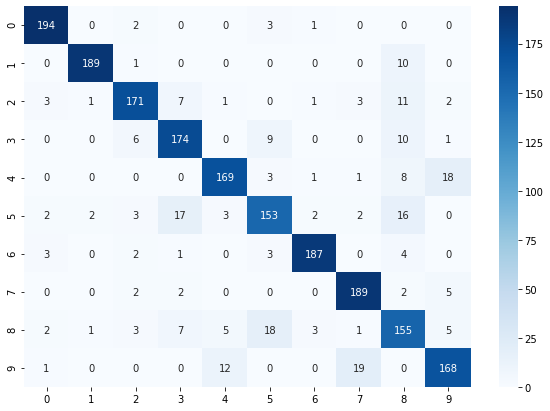

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [44]:
from sklearn.mixture import GaussianMixture as GMM 
import time
num_cluster_per_num = 1
gmm = GMM(n_components=num_cluster_per_num*10) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 0.5784261226654053
Processing time is : 0.0027740001678466797


In [45]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [46]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [47]:
accuracy_score(new_outputs[0],test_labels[0])

0.8015

In [48]:
num_cluster_per_num = 4
gmm = GMM(n_components=num_cluster_per_num*10) # random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 2.9577159881591797
Processing time is : 0.009790420532226562


In [49]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [50]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(200)
new_outputs = np.array(new_outputs).reshape(1,2000)

In [51]:
accuracy_score(new_outputs[0],test_labels[0])

0.8315

In [52]:
num_cluster_per_num = 16
gmm = GMM(n_components=num_cluster_per_num*10) #random_state=0,max_iter=300)
time_before_fitting = time.time()
gmm.fit(Lda_train_data)
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = gmm.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 31.04239296913147
Processing time is : 0.03845953941345215


In [53]:
mapped_labels = map_clast(Y_pred,num_cluster_per_num)

In [54]:
new_outputs = []
for j in range(0,10):
  for i in range(j*200,(j+1)*200):
    if np.isin(Y_pred[i],mapped_labels[j]):
      new_outputs.append(j)
    else: 
      new_outputs.append(np.random.choice(range(0,10),1)[0])
new_outputs = np.array(new_outputs).reshape(1,2000)

In [55]:
accuracy_score(new_outputs[0],test_labels[0])

0.881

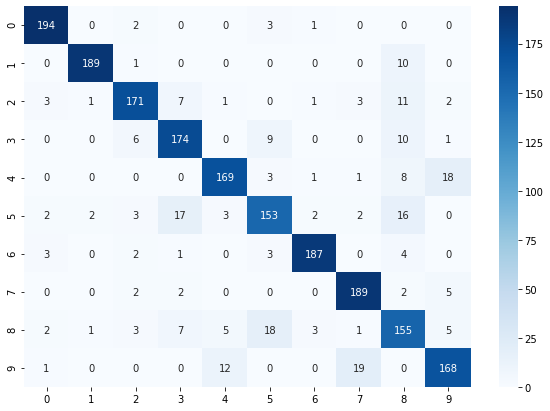

In [56]:
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],out_puts))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')

In [57]:
from sklearn.svm import SVC
from sklearn.utils import shuffle
clf = SVC(C=.1,kernel = 'linear')
x , y = shuffle(Lda_train_data,train_labels.reshape(10000,))
time_before_fitting = time.time()
clf.fit(x, y.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 0.33713746070861816
Processing time is : 0.12744140625


In [58]:
accuracy_score(Y_pred,test_labels[0])

0.862

In [59]:
clf = SVC(kernel = 'rbf',degree=3)

time_before_fitting = time.time()
clf.fit(Lda_train_data, train_labels.reshape(10000,))
time_after_fitting = time.time()
print("Processing time is :",time_after_fitting-time_before_fitting)
time_before_test = time.time()
Y_pred = clf.predict(Lda_test_data)
time_after_test = time.time()
print("Processing time is :",time_after_test-time_before_test)

Processing time is : 0.6017787456512451
Processing time is : 0.2572593688964844


In [60]:
accuracy_score(Y_pred,test_labels[0])

0.877

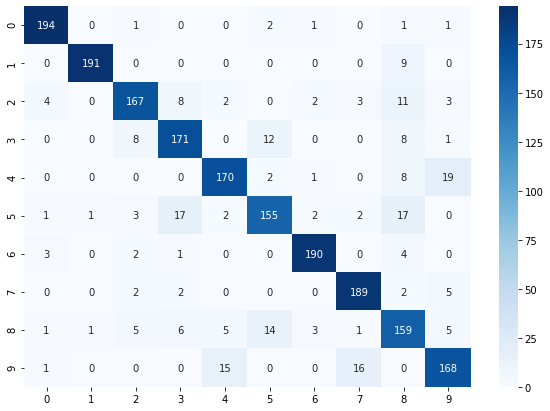

In [61]:
df_cm = pd.DataFrame(confusion_matrix(test_labels[0],Y_pred))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')